<a href="https://colab.research.google.com/github/ClaudioAresu/TensorFlow/blob/main/03introduction_to_computer_vision_with_tf_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-21 14:26:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.6MB/s    in 3.2s    

2023-02-21 14:27:01 (32.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data (become one with the data)

A very crucial step at the beginning of any machine learning project is becoming one with the data, and as far as a computer vision problem goes, it means, visualize the data.

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
 print(f"There are {len(dirnames)} directiores and {len(filenames)} images in '{dirpath}'.")

There are 2 directiores and 0 images in 'pizza_steak'.
There are 2 directiores and 0 images in 'pizza_steak/test'.
There are 0 directiores and 250 images in 'pizza_steak/test/pizza'.
There are 0 directiores and 250 images in 'pizza_steak/test/steak'.
There are 2 directiores and 0 images in 'pizza_steak/train'.
There are 0 directiores and 750 images in 'pizza_steak/train/pizza'.
There are 0 directiores and 750 images in 'pizza_steak/train/steak'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, le's first get the class names programmatically.

In [ ]:
# Get the classnames programmmatically
import pathlib
import numpy as  np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  #Get a random image
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") #show the shape of the image

  return img

['370643.jpg']
Image shape: (512, 382, 3)


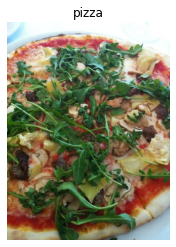

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[216, 236, 243],
        [216, 236, 243],
        [217, 237, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[217, 237, 244],
        [217, 237, 244],
        [217, 237, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[218, 238, 245],
        [217, 237, 244],
        [216, 236, 243],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[165, 160, 130],
        [170, 165, 133],
        [172, 167, 135],
        ...,
        [177, 215, 238],
        [175, 213, 236],
        [174, 212, 235]],

       [[163, 158, 128],
        [168, 163, 133],
        [170, 165, 133],
        ...,
        [176, 214, 237],
        [174, 212, 235],
        [173, 211, 234]],

       [[164, 160, 131],
        [167, 164, 133],
        [167, 164, 133],
        ...,
        [176, 214, 23

In [ ]:
#View the image shape

img.shape # returns width, height, colour channels

(512, 382, 3)

In [ ]:
# Get all the pixel values between 0 and 1

img/255.


array([[[0.84705882, 0.9254902 , 0.95294118],
        [0.84705882, 0.9254902 , 0.95294118],
        [0.85098039, 0.92941176, 0.95686275],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.85098039, 0.92941176, 0.95686275],
        [0.85098039, 0.92941176, 0.95686275],
        [0.85098039, 0.92941176, 0.95686275],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.85490196, 0.93333333, 0.96078431],
        [0.85098039, 0.92941176, 0.95686275],
        [0.84705882, 0.9254902 , 0.95294118],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.64705882, 0.62745098, 0.50980392],
        [0.66666667, 0.64705882, 0.52156863],
        [0.6745098 , 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our iamges
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPool2D
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#Preprocess data (get all the bvalues between 0 and 1, also called a scaling or normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
#Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid",),
    tf.keras.layers.Conv2D(10, 3, activation ="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 229ms/step - loss: 0.6110 - accuracy: 0.6673 - val_loss: 0.4195 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4366 - accuracy: 0.8033 - val_loss: 0.3562 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 10s 223ms/step - loss: 0.3986 - accuracy: 0.8267 - val_loss: 0.3263 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3796 - accuracy: 0.8293 - val_loss: 0.3190 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3394 - accuracy: 0.8560 - val_loss: 0.3183 - val_accuracy: 0.8580


**Note:** If the above cell is taking longer than 10 seconds per epich, make sure you're using a GPU (or TPU) and re-run all previous code.

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

https://poloclub.github.io/cnn-explainer/ Read tomorrow after surgery

## Use the same model as before, but without using CNN
 Let's replicate the model we've built in a prevuious section to seee if it works with our image data

In [ ]:
#Set random seed

tf.random.set_seed(42)

#Create a model to replicate the TensorFlowPlayground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 205ms/step - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Set random seed

tf.random.set_seed(42)

#Create a model to replicate the TensorFlowPlayground model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=6,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/6
47/47 [==============================] - 10s 185ms/step - loss: 0.6673 - accuracy: 0.5793 - val_loss: 0.5322 - val_accuracy: 0.7480
Epoch 2/6
47/47 [==============================] - 9s 200ms/step - loss: 0.5825 - accuracy: 0.7027 - val_loss: 0.5015 - val_accuracy: 0.7620
Epoch 3/6
47/47 [==============================] - 10s 213ms/step - loss: 0.5370 - accuracy: 0.7327 - val_loss: 0.5141 - val_accuracy: 0.7740
Epoch 4/6
47/47 [==============================] - 10s 211ms/step - loss: 0.5033 - accuracy: 0.7540 - val_loss: 0.4688 - val_accuracy: 0.7780
Epoch 5/6
47/47 [==============================] - 9s 190ms/step - loss: 0.4789 - accuracy: 0.7707 - val_loss: 0.5374 - val_accuracy: 0.7240
Epoch 6/6
47/47 [==============================] - 9s 201ms/step - loss: 0.4633 - accuracy: 0.7860 - val_loss: 0.4359 - val_accuracy: 0.7980


##It works better with SGD, 

I changed the amount of hidden layers and the Dense Values, without any subustantial increase in performance, after changing to SGD, I saw a significant accuracy increase and decided to double the amount of epochs (from 5 to 10) to see if I would gain significant accuracy before overfitting, the max accuracy was found in the 6th epoch so I reduced again the max epochs, this time to 6, increased the parameters of the hidden layers up to 100 and gained a meager 3% extra accuracy.

['1032846.jpg']
Image shape: (307, 512, 3)
['2501961.jpg']
Image shape: (512, 512, 3)


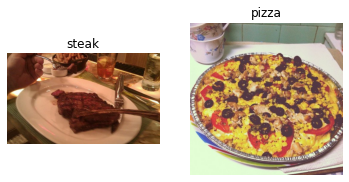

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

In [ ]:
# Create train and test data generators and rescale the data

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
#Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory of images
                                                  target_size=(224, 224), #target size of images(height, width)
                                                  class_mode="binary", #class mode, default is categorical
                                                  batch_size=32, # size of minibatches
                                                  seed=42) #random seed

test_data = test_datagen.flow_from_directory(directory=test_dir,
                              target_size=(224,224),
                              class_mode="binary",
                              batch_size=32,
                              seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
#Get a sample of a sample train data batch
images, labels = train_data.next() # get the "next"  batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
 #How amny batches are there?
 len(train_data)

47

In [ ]:
images[:2], images[0]

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [ ]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### Creating a CNN model (starting witha  baseline)
A baseline is a relatively simple model that will be the default model upon which we try to improve (experiment, experiment, experiment)

In [ ]:
# Make the creating of our modela little easier
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import Sequential


In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,#filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3,  #the size of the sliding window going across an input
           strides=1, #the size of the step the sliding window takes across an input
           padding="valid", # if valid, output shape gets compressed, if "same" output shape is the same as the input shape
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 225ms/step - loss: 0.9120 - accuracy: 0.6320 - val_loss: 0.5160 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.5004 - accuracy: 0.7673 - val_loss: 0.4759 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4390 - accuracy: 0.8067 - val_loss: 0.4323 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3364 - accuracy: 0.8607 - val_loss: 0.4688 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.2197 - accuracy: 0.9273 - val_loss: 0.4239 - val_accuracy: 0.8240


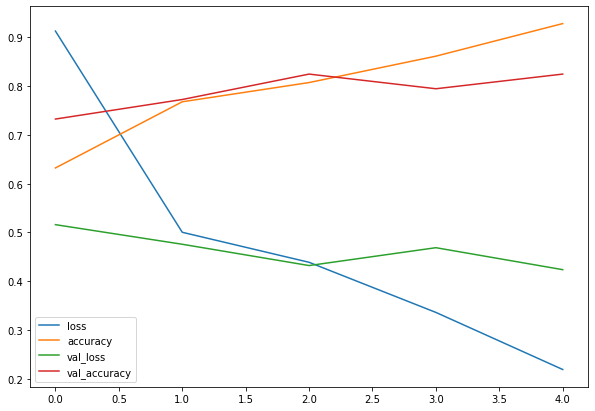

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for trainings and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure()
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()
  
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

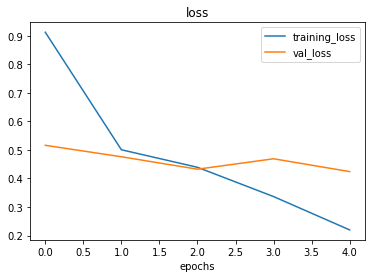

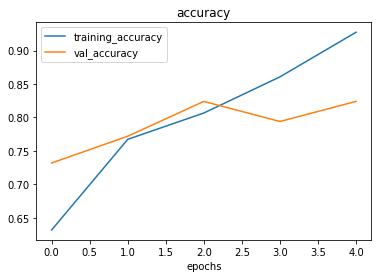

In [ ]:
plot_loss_curves(history_4)

**Note:** When a model's validation loss isn't decreasing it's likely that the model is **overfitting** the training dataset. This means, it's learning the pattersin the training dataset *too well*, and thus the model's ability  to generalize to unseen dataset will be diminished

* Add data augmentation
* Add regularization layers( such as MaxPool2D)
* Add more data

In [ ]:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 265ms/step - loss: 0.5836 - accuracy: 0.6953 - val_loss: 0.4399 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4610 - accuracy: 0.7993 - val_loss: 0.4057 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4132 - accuracy: 0.8180 - val_loss: 0.3387 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3929 - accuracy: 0.8327 - val_loss: 0.3473 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3793 - accuracy: 0.8520 - val_loss: 0.3545 - val_accuracy: 0.8460


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

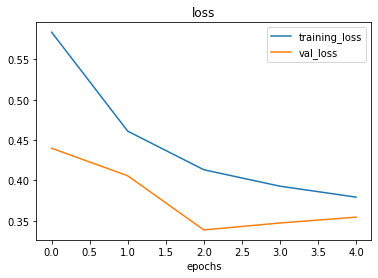

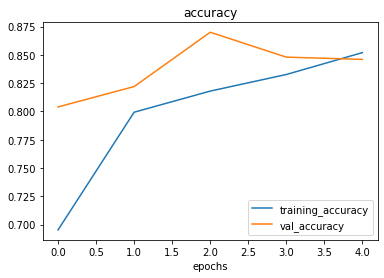

In [ ]:
plot_loss_curves(history=history_5)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
print("augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   shuffle=False)
print("non-augmented training data:")   
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               shuffle=False)
print("non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             shuffle=False)   

augmented training data:
Found 1500 images belonging to 2 classes.
non-augmented training data:
Found 1500 images belonging to 2 classes.
non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation si usually only performed on the training data. Using ImageDataGenerator built-in data augmentation parameters our inamges are left as they are in the directories but are modified as they are loaded in the model

In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 14


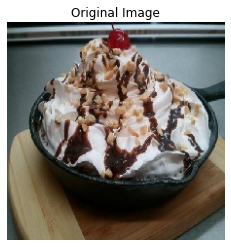

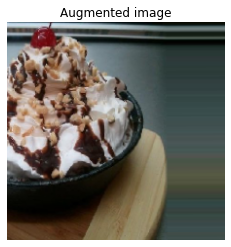

In [ ]:
import random
random_number = random.randint(0, 33)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
model_6 = Sequential([
    Conv2D(10, 3, activation ="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation ="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation ="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 595ms/step - loss: 0.7239 - accuracy: 0.5180 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 505ms/step - loss: 0.7066 - accuracy: 0.4147 - val_loss: 0.6918 - val_accuracy: 0.5280
Epoch 3/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6917 - accuracy: 0.5367 - val_loss: 0.6894 - val_accuracy: 0.5580
Epoch 4/5
47/47 [==============================] - 24s 518ms/step - loss: 0.6929 - accuracy: 0.5220 - val_loss: 0.6876 - val_accuracy: 0.5940
Epoch 5/5
47/47 [==============================] - 24s 508ms/step - loss: 0.6933 - accuracy: 0.5320 - val_loss: 0.6871 - val_accuracy: 0.6260


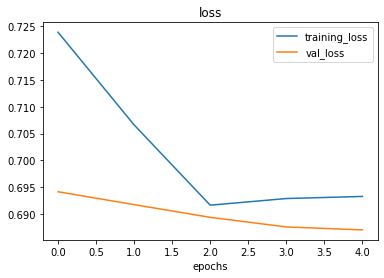

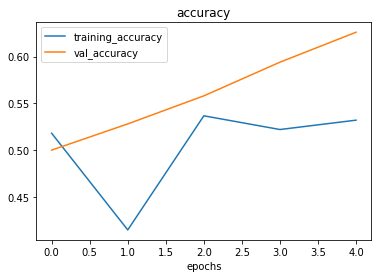

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffle_variable = train_datagen_augmented.flow_from_directory(train_dir,
                                                                                    target_size=(224, 224),
                                                                                    class_mode="binary",
                                                                                    batch_size=32,
                                                                                    shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])
    
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics="accuracy")

history_7 = model_7.fit(train_data_augmented_shuffle_variable,
              epochs=5,
              steps_per_epoch=len(train_data_augmented_shuffle_variable),
              validation_data=test_data,
              validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 545ms/step - loss: 0.6803 - accuracy: 0.5953 - val_loss: 0.6073 - val_accuracy: 0.6860
Epoch 2/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6054 - accuracy: 0.6873 - val_loss: 0.6344 - val_accuracy: 0.6200
Epoch 3/5
47/47 [==============================] - 24s 512ms/step - loss: 0.5632 - accuracy: 0.7367 - val_loss: 0.4356 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 24s 517ms/step - loss: 0.5266 - accuracy: 0.7453 - val_loss: 0.4247 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 24s 516ms/step - loss: 0.4927 - accuracy: 0.7660 - val_loss: 0.3735 - val_accuracy: 0.8380


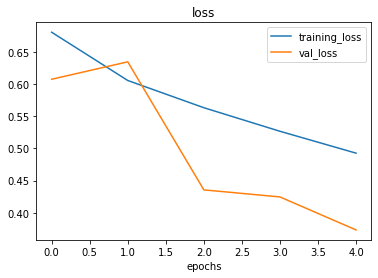

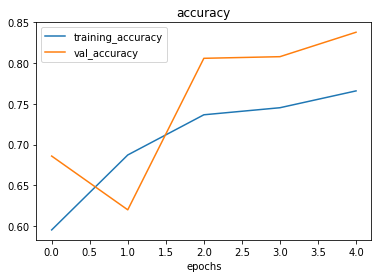

In [ ]:
plot_loss_curves(history=history_7)

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2023-02-21 14:36:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-02-21 14:36:58 (90.2 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

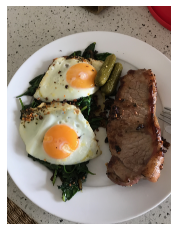

In [ ]:
plt.imshow(steak)
plt.axis(False)

In [ ]:
model_7.predict(steak)

ValueError: ignored

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, then you need your data to be at the same shape of the trained model

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  
  #Read in the image
  img = tf.io.read_file(filename)
  #Decode
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(expanded_steak)

1/1 [==============================] - 0s 195ms/step


In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):

  #Import image and pre-process
  img = load_and_prep_image(filename)
 
  #Make a prediction
  pred = model_7.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Add in logic for multi-class
  if len(pred[0] > 1):
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  #Plot the image and predict class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 22ms/step


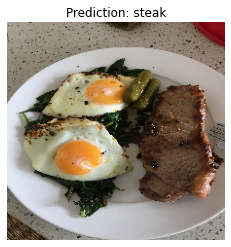

In [ ]:
pred_and_plot(model_7, "03-steak.jpeg")

--2023-02-21 15:18:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2023-02-21 15:18:37 (113 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

1/1 [==============================] - 0s 70ms/step


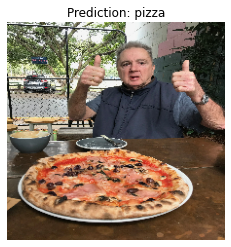

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-02-21 15:33:18--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 108.177.119.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  39.7MB/s    in 13s     

2023-02-21 15:33:31 (38.7 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Feb 21 15:33 .
drwxr-xr-x  1 root root 4096 Feb 21 15:33 ..
drwxr-xr-x 12 root root 4096 Feb 21 15:33 test
drwxr-xr-x 12 root root 4096 Feb 21 15:33 train


In [ ]:
#Setup the traind and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
#Let's get the class names
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1914969.jpg']
Image shape: (512, 512, 3)


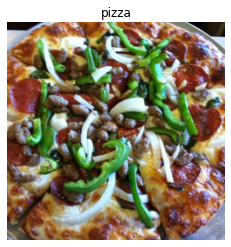

In [ ]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
random.choice(class_names)

'grilled_salmon'

In [ ]:
#Rescale

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#Load data in from ddirectories and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224))

test_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 230ms/step - loss: 2.2154 - accuracy: 0.1965 - val_loss: 2.0609 - val_accuracy: 0.2604
Epoch 2/5
235/235 [==============================] - 52s 221ms/step - loss: 1.9100 - accuracy: 0.3347 - val_loss: 1.8965 - val_accuracy: 0.3456
Epoch 3/5
235/235 [==============================] - 53s 224ms/step - loss: 1.5980 - accuracy: 0.4581 - val_loss: 1.9345 - val_accuracy: 0.3480
Epoch 4/5
235/235 [==============================] - 53s 224ms/step - loss: 1.0314 - accuracy: 0.6587 - val_loss: 2.3676 - val_accuracy: 0.2964
Epoch 5/5
235/235 [==============================] - 65s 276ms/step - loss: 0.4318 - accuracy: 0.8644 - val_loss: 3.0926 - val_accuracy: 0.2896


In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 13s 158ms/step - loss: 3.0926 - accuracy: 0.2896


[3.092578649520874, 0.2896000146865845]

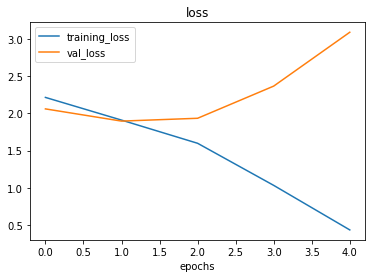

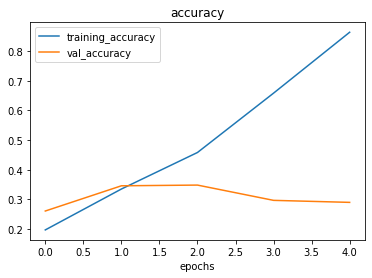

In [ ]:
plot_loss_curves(history)

In [ ]:
model_10 = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3)),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_10.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [ ]:
model_10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)            

In [ ]:
history_10 = model_10.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 214ms/step - loss: 2.1169 - accuracy: 0.2315 - val_loss: 1.9436 - val_accuracy: 0.3024
Epoch 2/5
235/235 [==============================] - 61s 259ms/step - loss: 1.7754 - accuracy: 0.3959 - val_loss: 1.8707 - val_accuracy: 0.3460
Epoch 3/5
235/235 [==============================] - 49s 210ms/step - loss: 1.3913 - accuracy: 0.5392 - val_loss: 1.9465 - val_accuracy: 0.3412
Epoch 4/5
235/235 [==============================] - 59s 252ms/step - loss: 0.8902 - accuracy: 0.7284 - val_loss: 2.2774 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 48s 205ms/step - loss: 0.4895 - accuracy: 0.8628 - val_loss: 2.7919 - val_accuracy: 0.3160


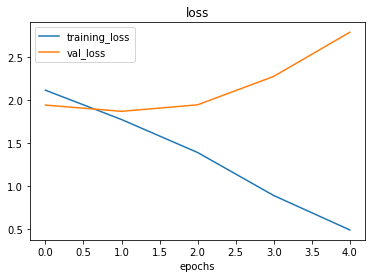

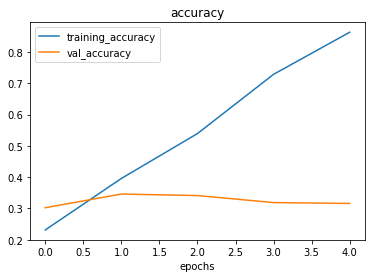

In [ ]:
plot_loss_curves(history_10)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32)

Found 7500 images belonging to 10 classes.


In [ ]:
model_11 = tf.keras.models.clone_model(model_9)

#Compile the cloned model
model_11.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [ ]:
history_11 = model_11.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 139s 583ms/step - loss: 2.2684 - accuracy: 0.1435 - val_loss: 2.2048 - val_accuracy: 0.1908
Epoch 2/5
235/235 [==============================] - 139s 592ms/step - loss: 2.1697 - accuracy: 0.2075 - val_loss: 2.0100 - val_accuracy: 0.2940
Epoch 3/5
235/235 [==============================] - 137s 585ms/step - loss: 2.1061 - accuracy: 0.2407 - val_loss: 1.9777 - val_accuracy: 0.3128
Epoch 4/5
235/235 [==============================] - 128s 545ms/step - loss: 2.0616 - accuracy: 0.2711 - val_loss: 2.1490 - val_accuracy: 0.2864
Epoch 5/5
235/235 [==============================] - 131s 556ms/step - loss: 2.0207 - accuracy: 0.2920 - val_loss: 1.8732 - val_accuracy: 0.3592


1/1 [==============================] - 0s 27ms/step


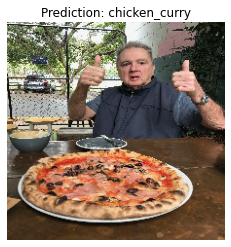

In [ ]:
pred_and_plot(model_11,
              "03-pizza-dad.jpeg")

In [ ]:
model_11.save("saved_trained_model_11")

In [ ]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 16s 198ms/step - loss: 1.8732 - accuracy: 0.3592


[1.8731558322906494, 0.35920000076293945]

In [ ]:
model_11.evaluate(test_data)

79/79 [==============================] - 12s 158ms/step - loss: 1.8732 - accuracy: 0.3592


[1.8731554746627808, 0.35920000076293945]

**Exercise:** https://github.com/mrdbourke/tensorflow-deep-learning
